In [1]:
import pandas as pd

# READING IN 2025 BOOK SALES PERFORMANCE
sales2025 = pd.read_excel("/Users/tiffanyng/Desktop/Book performance 2025.xlsx", skiprows=1)

In [2]:
print(sales2025.head())

            Unnamed: 0  Paperbacks  Paperbacks.1  Hardcovers  Hardcovers.1  \
0      Fearful in Gaza         256       4117.21           0           0.0   
1         Simply Hegel          46        221.70           0           0.0   
2  Simply Wittgenstein          76        371.13           0           0.0   
3       Simply Riemann          71        267.36           0           0.0   
4     Simply Nietzsche          53        211.68           0           0.0   

   Ebooks (Paid)  Ebooks  Ebooks (Free)  Audiobooks  Audiobooks.1  Reads  \
0              0    0.00              0           0          0.00      0   
1             32  143.85              0         177        190.72      0   
2             47  184.39              1           0          0.00      0   
3             46  176.30              1          45         39.33      1   
4             18   87.57              0         105        122.35      0   

   Borrows  Reads.1  Total Gross Royalties  Total Spending  \
0        0  

In [3]:
# CHECKING COLUMN NAMES
print(sales2025.columns.tolist())

# RENAMING COLUMN NAMES 
sales2025.columns = ["title", "paperbacks_count", "paperbacks_royalty", "hardcovers_count", "hardcovers_royalty", "ebooks_paid_count", "ebooks_royalty", "ebooks_free_count", "audiobooks_count", "audiobooks_royalty", "reads", "borrows", "reads.1", "total_gross_royalties", "total_spending", "total_net_royalties"]

# CHECKING CHANGES
print(sales2025.columns.tolist())

['Unnamed: 0', 'Paperbacks', 'Paperbacks.1', 'Hardcovers', 'Hardcovers.1', 'Ebooks (Paid)', 'Ebooks', 'Ebooks (Free)', 'Audiobooks', 'Audiobooks.1', 'Reads', 'Borrows', 'Reads.1', 'Total Gross Royalties', 'Total Spending', 'Total Net Royalties']
['title', 'paperbacks_count', 'paperbacks_royalty', 'hardcovers_count', 'hardcovers_royalty', 'ebooks_paid_count', 'ebooks_royalty', 'ebooks_free_count', 'audiobooks_count', 'audiobooks_royalty', 'reads', 'borrows', 'reads.1', 'total_gross_royalties', 'total_spending', 'total_net_royalties']


In [4]:
# SELECTING RELEVANT COLUMNS
royalty2025 = sales2025[["title", "paperbacks_count", "paperbacks_royalty", "hardcovers_count", "hardcovers_royalty", "ebooks_paid_count", "ebooks_royalty", "ebooks_free_count", "audiobooks_count", "audiobooks_royalty"]]

# CHECKING SUBSET
print(royalty2025.head())

# CHECKING DATA TYPE OF EACH COLUMN
print(royalty2025.info())

                 title  paperbacks_count  paperbacks_royalty  \
0      Fearful in Gaza               256             4117.21   
1         Simply Hegel                46              221.70   
2  Simply Wittgenstein                76              371.13   
3       Simply Riemann                71              267.36   
4     Simply Nietzsche                53              211.68   

   hardcovers_count  hardcovers_royalty  ebooks_paid_count  ebooks_royalty  \
0                 0                 0.0                  0            0.00   
1                 0                 0.0                 32          143.85   
2                 0                 0.0                 47          184.39   
3                 0                 0.0                 46          176.30   
4                 0                 0.0                 18           87.57   

   ebooks_free_count  audiobooks_count  audiobooks_royalty  
0                  0                 0                0.00  
1                  0    

In [5]:
# PRINT BOOKS (i.e. paperback & hardcover) = 10%
print_royalty_percentage = 0.10

# AUDIBLE/EBOOKS (i.e. audiobooks & ebooks) = 25%
audio_royalty_percentage = 0.25

# MAKE COPY 
royalty2025 = royalty2025.copy()

# CALCULATING PRINT BOOKS ROYALTY -> NEW COLUMN: print_authors_royalty
royalty2025['print_authors_royalty'] = (
    royalty2025['paperbacks_royalty'] * print_royalty_percentage + 
    royalty2025['hardcovers_royalty'] * print_royalty_percentage
)

# CALCULATING AUDIO ROYALTY -> NEW COLUMN: audio_authors_royalty
royalty2025['audio_authors_royalty'] = (
    royalty2025['ebooks_royalty'] * audio_royalty_percentage + 
    royalty2025['audiobooks_royalty'] * audio_royalty_percentage
)

# CALCULATING TOTAL AUTHOR'S ROYALTY FROM PRINT + AUDIO BOOKS
royalty2025['total_authors_royalty'] = royalty2025['print_authors_royalty'] + royalty2025['audio_authors_royalty']
print(royalty2025.head())

                 title  paperbacks_count  paperbacks_royalty  \
0      Fearful in Gaza               256             4117.21   
1         Simply Hegel                46              221.70   
2  Simply Wittgenstein                76              371.13   
3       Simply Riemann                71              267.36   
4     Simply Nietzsche                53              211.68   

   hardcovers_count  hardcovers_royalty  ebooks_paid_count  ebooks_royalty  \
0                 0                 0.0                  0            0.00   
1                 0                 0.0                 32          143.85   
2                 0                 0.0                 47          184.39   
3                 0                 0.0                 46          176.30   
4                 0                 0.0                 18           87.57   

   ebooks_free_count  audiobooks_count  audiobooks_royalty  \
0                  0                 0                0.00   
1                  0  

In [6]:
# CREATING A FUNCTION THAT READS IN EACH EXCEL SHEET PER PLATFORM
def read_sales_data(file_path, platform_name, skiprows=1, show_preview=True):
    """
    Read sales data from any platform Excel file
    
    Parameters:
    - file_path: path to the Excel file
    - platform_name: name of the platform
    - skiprows: number of rows to skip (default: 1)
    - show_preview: whether to print head() (default: True)
    
    Returns:
    - DataFrame with the data
    """
    df = pd.read_excel(file_path, skiprows=skiprows)
    
    if show_preview:
        print(f"\n{platform_name.upper()} Sales Data:")
        print(df.head())
    
    return df

In [7]:
# ADDING IN AMAZON 
amazon2025 = read_sales_data("/Users/tiffanyng/Desktop/Amazon.xlsx", "amazon")
print(amazon2025.columns.tolist())

# RENAMING COLUMNS
amazon2025.columns = ["title", "ASIN", "series", "books_order_in_series", "series_name", "amazon_paperbacks_count", "amazon_distribution", "amazon_hardcover", "amazon_ebooks_paid", "amazon_ebooks_free", "amazon_audiobooks", "ad_orders", "total_ad_clicks", "amazon_ad_clicks", "facebook_ad_clicks", "amazon_reads", "amazon_gross_royalties", "total_spendings", "amazon_spending", "facebook_spending", "bookbub_spending", "external_spending", "amazon_net_royalties"]

# SELECTING SUBSET
amazon2025royalties = amazon2025[["title", "amazon_paperbacks_count", "amazon_hardcover", "amazon_ebooks_paid", "amazon_ebooks_free", "amazon_gross_royalties", "amazon_net_royalties"]]

# MERGING SALES OF TYPE (i.e. print, audio) BY DISTRIBUTION (i.e. Amazon, WooCommerce, PublishDrive...)
royalty2025 = pd.merge(royalty2025, amazon2025royalties, on='title', how='left')
print(royalty2025.info())


AMAZON Sales Data:
                                               Title        ASIN  \
0                                Simply Wittgenstein  1943657084   
1                                       Simply Dirac  1943657092   
2                                     Simply Riemann  1943657211   
3  The Paris Husband: How It Really Was Between E...  1943657688   
4                                       Simply Hegel  1943657408   

               Series  Book's Order in Series  Series Name  Paperbacks  \
0   #5 in Great Lives                     5.0  Great Lives          70   
1   #1 in Great Lives                     1.0  Great Lives          47   
2   #5 in Great Lives                     5.0  Great Lives          52   
3                 NaN                     NaN          NaN          33   
4  #16 in Great Lives                    16.0  Great Lives          42   

   Distribution  Hardcover  Ebooks (Paid)  Ebooks (Free)  ...  \
0             0          0             27              0  ...

In [8]:
# ADDING IN WOOCOMMERCE 
woocommerce2025 = read_sales_data("/Users/tiffanyng/Desktop/WooCommerce.xlsx", "woocommerce")

# RENAMING COLUMNS 
woocommerce2025.columns = ["title", "ASIN", "series", "books_order_in_series", "series_name", "woocommerce_paperbacks_count", "woocommerce_distribution", "woocommerce_hardcover", "woocommerce_ebooks_paid", "woocommerce_ebooks_free", "woocommerce_audiobooks", "ad_orders", "total_ad_clicks", "woocommerce_ad_clicks", "facebook_ad_clicks", "woocommerce_reads", "woocommerce_gross_royalties", "total_spendings", "amazon_spending", "facebook_spending", "bookbub_spending", "external_spending", "woocommerce_net_royalties"]

# SELECTING SUBSET
woocommerce2025royalties = woocommerce2025[["title", "woocommerce_paperbacks_count", "woocommerce_hardcover", "woocommerce_ebooks_paid", "woocommerce_ebooks_free", "woocommerce_gross_royalties", "woocommerce_net_royalties"]]

royalty2025 = pd.merge(royalty2025, woocommerce2025royalties, on='title', how='left')
print(royalty2025.info())


WOOCOMMERCE Sales Data:
                                               Title   ASIN  Series  \
0                                    Fearful in Gaza  99341     NaN   
1                                          Moby-Dick  22579     NaN   
2  William Faulkner Unisex Tee – Literary Graphic...  20451     NaN   
3        Gaza Burning: Voices from the Rubble of War  85990     NaN   
4                                  A Christmas Carol  22568     NaN   

   Book's Order in Series  Series Name  Paperbacks  Distribution  Hardcover  \
0                     NaN          NaN         226             0          0   
1                     NaN          NaN           1             0          0   
2                     NaN          NaN           1             0          0   
3                     NaN          NaN           2             0          0   
4                     NaN          NaN           1             0          0   

   Ebooks (Paid)  Ebooks (Free)  ...  Ad Clicks (AMZ)  Ad Clicks (FB)  Re

In [9]:
# ADDING IN PUBLISHDRIVE 
publishdrive2025 = read_sales_data("/Users/tiffanyng/Desktop/PublishDrive.xlsx", "publishdrive")

# RENAMING COLUMNS 
publishdrive2025.columns = ["title", "ASIN", "series", "books_order_in_series", "series_name", "publishdrive_paperbacks_count", "publishdrive_distribution", "publishdrive_hardcover", "publishdrive_ebooks_paid", "publishdrive_ebooks_free", "publishdrive_audiobooks", "ad_orders", "total_ad_clicks", "amazon_ad_clicks", "facebook_ad_clicks", "publishdrive_reads", "publishdrive_gross_royalties", "total_spendings", "amazon_spending", "facebook_spending", "bookbub_spending", "external_spending", "publishdrive_net_royalties"]

# SELECTING SUBSET
publishdrive2025royalties = publishdrive2025[["title", "publishdrive_paperbacks_count", "publishdrive_hardcover", "publishdrive_ebooks_paid", "publishdrive_ebooks_free", "publishdrive_gross_royalties", "publishdrive_net_royalties"]]

royalty2025 = pd.merge(royalty2025, publishdrive2025royalties, on='title', how='left')
print(royalty2025.info())


PUBLISHDRIVE Sales Data:
                 Title                          ASIN  Series  \
0       Simply Riemann  PublishDrive - 9781943657780     NaN   
1         Simply Gödel  PublishDrive - 9781943657148     NaN   
2         Simply Hegel  PublishDrive - 9781943657414     NaN   
3     Simply Nietzsche  PublishDrive - 9781943657513     NaN   
4  Simply Wittgenstein  PublishDrive - 9781943657049     NaN   

   Book's Order in Series  Series Name  Paperbacks  Distribution  Hardcover  \
0                     NaN          NaN           0             0          0   
1                     NaN          NaN           0             0          0   
2                     NaN          NaN           0             0          0   
3                     NaN          NaN           0             0          0   
4                     NaN          NaN           0             0          0   

   Ebooks (Paid)  Ebooks (Free)  ...  Ad Clicks (AMZ)  Ad Clicks (FB)  Reads  \
0             22              1  .

In [10]:
# ADDING IN VOICESBYINAUDIO
voicesbyinaudio2025 = read_sales_data("/Users/tiffanyng/Desktop/VoicesbyINaudio.xlsx", "VoicesbyINaudio")

# RENAMING COLUMNS 
voicesbyinaudio2025.columns = ["title", "ASIN", "series", "books_order_in_series", "series_name", "voicesbyINaudio_paperbacks_count", "voicesbyINaudio_distribution", "voicesbyINaudio_hardcover", "voicesbyINaudio_ebooks_paid", "voicesbyINaudio_ebooks_free", "voicesbyINaudio_audiobooks", "ad_orders", "total_ad_clicks", "amazon_ad_clicks", "facebook_ad_clicks", "publishdrive_reads", "voicesbyINaudio_gross_royalties", "total_spendings", "amazon_spending", "facebook_spending", "bookbub_spending", "external_spending", "voicesbyINaudio_net_royalties"]

# SELECTING SUBSET
voicesbyinaudio2025royalties = voicesbyinaudio2025[["title", "voicesbyINaudio_paperbacks_count", "voicesbyINaudio_hardcover", "voicesbyINaudio_ebooks_paid", "voicesbyINaudio_ebooks_free", "voicesbyINaudio_gross_royalties", "voicesbyINaudio_net_royalties"]]

royalty2025 = pd.merge(royalty2025, voicesbyinaudio2025royalties, on='title', how='left')
print(royalty2025.info())


VOICESBYINAUDIO Sales Data:
               Title           ASIN  Series  Book's Order in Series  \
0   Simply Nietzsche  9781662235672     NaN                     NaN   
1       Simply Hegel  9781662263170     NaN                     NaN   
2      Simply Sartre  9781669620570     NaN                     NaN   
3     Simply Chomsky  9781664987364     NaN                     NaN   
4  Simply Schrdinger  9781669631989     NaN                     NaN   

   Series Name  Paperbacks  Distribution  Hardcover  Ebooks (Paid)  \
0          NaN           0             0          0              0   
1          NaN           0             0          0              0   
2          NaN           0             0          0              0   
3          NaN           0             0          0              0   
4          NaN           0             0          0              0   

   Ebooks (Free)  ...  Ad Clicks (AMZ)  Ad Clicks (FB)  Reads  \
0              0  ...                0               0    

In [11]:
# ADDING IN SPOTIFY
spotify2025 = read_sales_data("/Users/tiffanyng/Desktop/Spotify.xlsx", "spotify")

# RENAMING COLUMNS 
spotify2025.columns = ["title", "ASIN", "series", "books_order_in_series", "series_name", "spotify_paperbacks_count", "spotify_distribution", "spotify_hardcover", "spotify_ebooks_paid", "spotify_ebooks_free", "spotify_audiobooks", "ad_orders", "total_ad_clicks", "amazon_ad_clicks", "facebook_ad_clicks", "spotify_reads", "spotify_gross_royalties", "total_spendings", "amazon_spending", "facebook_spending", "bookbub_spending", "external_spending", "spotify_net_royalties"]

# SELECTING SUBSET
spotify2025royalties = spotify2025[["title", "spotify_paperbacks_count", "spotify_hardcover", "spotify_ebooks_paid", "spotify_ebooks_free", "spotify_gross_royalties", "spotify_net_royalties"]]

# FINAL MERGE WITH ALL PLATFORMS AND SALES
royalty2025 = pd.merge(royalty2025, spotify2025royalties, on='title', how='left')
print(royalty2025.info())


SPOTIFY Sales Data:
               Title           ASIN  Series  Book's Order in Series  \
0       Simply Hegel  9781662263170     NaN                     NaN   
1      Simply Sartre  9781669620570     NaN                     NaN   
2  Simply Stravinsky  9781664902466     NaN                     NaN   
3     Simply Beckett  9781667096209     NaN                     NaN   
4  Simply Schrdinger  9781669631989     NaN                     NaN   

   Series Name  Paperbacks  Distribution  Hardcover  Ebooks (Paid)  \
0          NaN           0             0          0              0   
1          NaN           0             0          0              0   
2          NaN           0             0          0              0   
3          NaN           0             0          0              0   
4          NaN           0             0          0              0   

   Ebooks (Free)  ...  Ad Clicks (AMZ)  Ad Clicks (FB)  Reads  \
0              0  ...                0               0      0   
1

In [20]:
# CHECKING MERGES
royalty2025.head()

# CHANGES NaN to 0
royalty2025 = royalty2025.fillna(0)
royalty2025.head()

,title,paperbacks_count,paperbacks_royalty,hardcovers_count,hardcovers_royalty,ebooks_paid_count,ebooks_royalty,ebooks_free_count,audiobooks_count,audiobooks_royalty,...,voicesbyINaudio_ebooks_paid,voicesbyINaudio_ebooks_free,voicesbyINaudio_gross_royalties,voicesbyINaudio_net_royalties,spotify_paperbacks_count,spotify_hardcover,spotify_ebooks_paid,spotify_ebooks_free,spotify_gross_royalties,spotify_net_royalties
0,Fearful in Gaza,256,4117.21,0,0.0,0,0.00,0,0,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00
1,Simply Hegel,46,221.70,0,0.0,32,143.85,0,177,190.72,...,0.0,0.0,80.68,80.68,0.0,0.0,0.0,0.0,110.04,110.04
2,Simply Wittgenstein,76,371.13,0,0.0,47,184.39,1,0,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00
3,Simply Riemann,71,267.36,0,0.0,46,176.30,1,45,39.33,...,0.0,0.0,30.85,30.85,0.0,0.0,0.0,0.0,8.48,8.48
4,Simply Nietzsche,53,211.68,0,0.0,18,87.57,0,105,122.35,...,0.0,0.0,110.57,110.57,0.0,0.0,0.0,0.0,11.78,11.78


In [36]:
import matplotlib.pyplot as plt

def plot_platform_royalties(df, title_name):
    row = df[df['title'] == title_name].iloc[0]

    platforms = ['Amazon', 'WooCommerce', 'PublishDrive', 'VoicesByINAudio', 'Spotify']
    net_royalties = [
        row['amazon_net_royalties'],
        row['woocommerce_net_royalties'],
        row['publishdrive_net_royalties'],
        row['voicesbyINaudio_net_royalties'],
        row['spotify_net_royalties']
    ]

    platform_colors = {
        'Amazon':          '#FF9900',
        'WooCommerce':     '#7F54B3',
        'PublishDrive':    '#2D9CDB',
        'VoicesByINAudio': '#E8453C',
        'Spotify':         '#1DB954'
    }

    # ── Guard: all zeros ───────────────────────────────────────────────────────
    if sum(net_royalties) == 0:
        fig, ax = plt.subplots(figsize=(8, 4))
        fig.patch.set_facecolor('#1A1A2E')
        ax.set_facecolor('#1A1A2E')
        ax.text(0.5, 0.5, 'No royalties recorded\nfor any platform',
                ha='center', va='center', fontsize=14, color='gray',
                transform=ax.transAxes)
        ax.set_title(f'Net Royalties by Platform — {title_name}',
                     color='white', fontsize=13, fontweight='bold')
        ax.axis('off')
        plt.tight_layout()
        plt.show()
        return

    colors = [platform_colors[p] for p in platforms]
    total  = sum(net_royalties)

    # ── Figure setup ───────────────────────────────────────────────────────────
    fig, ax = plt.subplots(figsize=(11, 6))
    fig.patch.set_facecolor('#1A1A2E')
    ax.set_facecolor('#1A1A2E')

    # ── Bars ───────────────────────────────────────────────────────────────────
    x = range(len(platforms))
    bars = ax.bar(x, net_royalties, color=colors, width=0.5,
                  linewidth=1.5, edgecolor='#1A1A2E')

    # Subtle glow effect — slightly wider, translucent bar behind each bar
    for i, (val, color) in enumerate(zip(net_royalties, colors)):
        ax.bar(i, val, width=0.58, color=color, alpha=0.25, zorder=0)

    # ── Bar labels ─────────────────────────────────────────────────────────────
    for bar, val in zip(bars, net_royalties):
        if val == 0:
            ax.text(bar.get_x() + bar.get_width() / 2,
                    max(net_royalties) * 0.02,
                    '⊘ $0.00', ha='center', va='bottom',
                    color='#888888', fontsize=9, fontstyle='italic')
        else:
            pct = val / total * 100
            ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + max(net_royalties) * 0.015,
                    f'${val:,.2f}\n({pct:.1f}%)',
                    ha='center', va='bottom',
                    color='white', fontsize=9, fontweight='bold')

    # ── Axes styling ───────────────────────────────────────────────────────────
    ax.set_xticks(list(x))
    ax.set_xticklabels(platforms, color='white', fontsize=10, fontweight='bold')
    ax.tick_params(axis='x', length=0)                     # hide x tick marks
    ax.tick_params(axis='y', colors='#AAAAAA', labelsize=9)

    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'${v:,.2f}'))

    # Horizontal grid lines only, subtle
    ax.yaxis.grid(True, color='#FFFFFF18', linewidth=0.8, linestyle='--')
    ax.set_axisbelow(True)

    # Remove all spines except bottom
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_color('#444444')

    # ── Labels & title ─────────────────────────────────────────────────────────
    ax.set_title(f'Net Royalties by Platform\n{title_name}',
                 color='white', fontsize=13, fontweight='bold', pad=15)
    ax.set_xlabel('Platform', color='#AAAAAA', fontsize=10, labelpad=10)
    ax.set_ylabel('Net Royalties (USD)', color='#AAAAAA', fontsize=10, labelpad=10)

    # Total annotation in top-left corner
    ax.annotate(f'Total Royalties: ${total:,.2f}',
                xy=(0, 1), xycoords='axes fraction',
                xytext=(10, -10), textcoords='offset points',
                ha='left', va='top', color='white',
                fontsize=10, fontweight='bold')

    # Extend y-axis headroom so labels don't clip
    ax.set_ylim(0, max(net_royalties) * 1.22)

    plt.tight_layout()
    plt.show()

In [14]:
royalty2025['title'].unique()

array(['Fearful in Gaza', 'Simply Hegel', 'Simply Wittgenstein',
       'Simply Riemann', 'Simply Nietzsche', 'Simply Dirac',
       'The Paris Husband: How It Really Was Between Ernest and Hadley Hemingway',
       'Simply Gödel', 'Simply Beethoven', 'Simply Sartre',
       'Simply Faulkner', 'Simply Stravinsky', 'Simply Tolstoy',
       'Simply Turing', 'Life of Chopin: Annotated Edition',
       "Hitler's Favorite Jew: The Enigma of Otto Weininger",
       'Simply Beckett', 'Simply Chekhov', 'Simply Descartes',
       'The Sound and the Fury: Annotated Edition', 'Simply Chomsky',
       'Simply Proust', 'Simply Napoleon', 'Simply Eliot',
       'Simply Keynes', 'Simply Einstein', 'Simply Joyce',
       'Simply Adorno', 'Simply Chinggis', 'Simply Schrdinger',
       'Gentlemen Prefer Blondes: Annotated Edition', 'Simply Darwin',
       'Simply Dickens', 'Simply Chopin',
       'Animal Farm: Annotated Edition',
       'Right Ho, Jeeves: Annotated Edition', 'Simply Hemingway',
       '

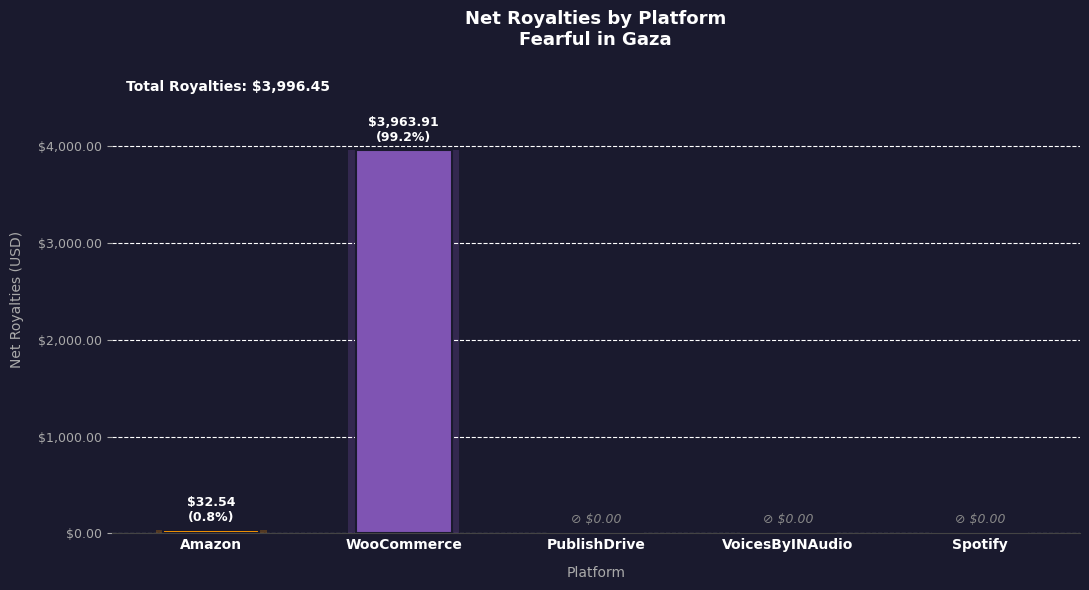

In [37]:
plot_platform_royalties(royalty2025, "Fearful in Gaza")

In [27]:
def plot_percentage_breakdown(df, title_name):
    row = df[df['title'] == title_name].iloc[0]

    platforms = ['Amazon', 'WooCommerce', 'PublishDrive', 'VoicesByINAudio', 'Spotify']
    net = [
        row['amazon_net_royalties'],
        row['woocommerce_net_royalties'],
        row['publishdrive_net_royalties'],
        row['voicesbyINaudio_net_royalties'],
        row['spotify_net_royalties']
    ]

    platform_colors = {
        'Amazon':         '#FF9900',   # Amazon orange
        'WooCommerce':    '#7F54B3',   # WooCommerce purple
        'PublishDrive':   '#2D9CDB',   # Blue
        'VoicesByINAudio':'#E8453C',   # Bold red  ← changed from green
        'Spotify':        '#1DB954'    # Spotify green
    }

    # ── Separate active vs zero platforms ──────────────────────────────────────
    active_labels, active_values, active_colors = [], [], []
    zero_labels = []

    for label, value in zip(platforms, net):
        if value > 0:
            active_labels.append(label)
            active_values.append(value)
            active_colors.append(platform_colors[label])
        else:
            zero_labels.append(label)

    total = sum(active_values)

    # ── Guard: nothing to plot ─────────────────────────────────────────────────
    if total == 0:
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.text(0.5, 0.5, 'No royalties recorded\nfor any platform',
                ha='center', va='center', fontsize=14, color='gray',
                transform=ax.transAxes)
        ax.set_title(f'Platform Royalty Share — {title_name}', fontsize=14, fontweight='bold')
        ax.axis('off')
        plt.tight_layout()
        plt.show()
        return

    # ── Build figure with pie + legend side-by-side ────────────────────────────
    fig, (ax_pie, ax_info) = plt.subplots(
        1, 2,
        figsize=(12, 6),
        gridspec_kw={'width_ratios': [2, 1]}
    )
    fig.patch.set_facecolor('#1A1A2E')
    for ax in (ax_pie, ax_info):
        ax.set_facecolor('#1A1A2E')

    # ── Pie ────────────────────────────────────────────────────────────────────
    explode = [0.04] * len(active_labels)          # slight separation on all slices

    wedges, texts, autotexts = ax_pie.pie(
        active_values,
        labels=None,
        colors=active_colors,
        explode=explode,
        autopct=lambda pct: f'{pct:.1f}%\n(${pct/100 * total:,.2f})',
        pctdistance=0.75,
        startangle=140,
        wedgeprops=dict(linewidth=2, edgecolor='#1A1A2E'),
        textprops=dict(color='white', fontsize=9)
    )

    # Style autotext
    for at in autotexts:
        at.set_fontsize(8.5)
        at.set_color('white')
        at.set_fontweight('bold')

    # Center donut label
    ax_pie.text(0, 0, f'Total\n${total:,.2f}',
                ha='center', va='center', fontsize=13,
                color='white', fontweight='bold')

    # Draw a white circle to create donut effect
    centre_circle = plt.Circle((0, 0), 0.50, fc='#1A1A2E')
    ax_pie.add_patch(centre_circle)

    ax_pie.set_title(f'Platform Royalty Share\n{title_name}',
                     color='white', fontsize=13, fontweight='bold', pad=15)

    # ── Info panel (legend + zero platforms) ───────────────────────────────────
    ax_info.axis('off')

    # Active platforms legend
    legend_y = 0.95
    ax_info.text(0.05, legend_y, 'Active Platforms', color='white',
                 fontsize=11, fontweight='bold', transform=ax_info.transAxes)
    legend_y -= 0.08

    for label, value, color in zip(active_labels, active_values, active_colors):
        pct = value / total * 100
        ax_info.add_patch(plt.Rectangle((0.05, legend_y - 0.02), 0.08, 0.05,
                                        color=color, transform=ax_info.transAxes,
                                        clip_on=False))
        ax_info.text(0.17, legend_y, f'{label}', color='white',
                     fontsize=9, fontweight='bold', transform=ax_info.transAxes)
        ax_info.text(0.17, legend_y - 0.055, f'${value:,.2f}  ({pct:.1f}%)',
                     color='#AAAAAA', fontsize=8, transform=ax_info.transAxes)
        legend_y -= 0.13

    # Zero platforms section
    if zero_labels:
        legend_y -= 0.04
        ax_info.text(0.05, legend_y, 'No Royalties', color='#FF6B6B',
                     fontsize=11, fontweight='bold', transform=ax_info.transAxes)
        legend_y -= 0.08
        for label in zero_labels:
            ax_info.text(0.05, legend_y, f'⊘  {label}', color='#888888',
                         fontsize=9, fontstyle='italic', transform=ax_info.transAxes)
            legend_y -= 0.09

    plt.tight_layout()
    plt.show()

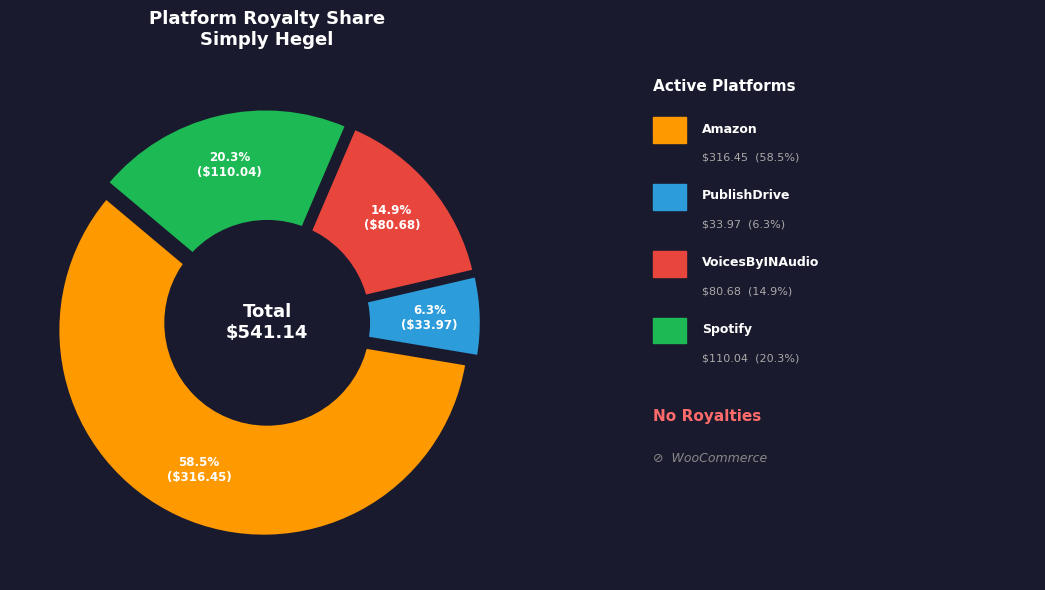

In [28]:
plot_percentage_breakdown(royalty2025, "Simply Hegel")